In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_filename = "kings_corner.csv"
raw_data = pd.read_csv(data_filename, delimiter=",")
game_cols = raw_data.columns[2:]
total_games = len(game_cols)

In [3]:
min_players, max_players = raw_data["Players"].min(), raw_data["Players"].max()
min_deal, max_deal = raw_data["Deal"].min(), raw_data["Deal"].max()
players = range(int(min_players), int(max_players+1))
deal = range(int(min_deal), int(max_deal+1))

In [4]:
raw_data["Mean"] = raw_data[game_cols].mean(axis=1)
raw_data["Median"] = raw_data[game_cols].median(axis=1)

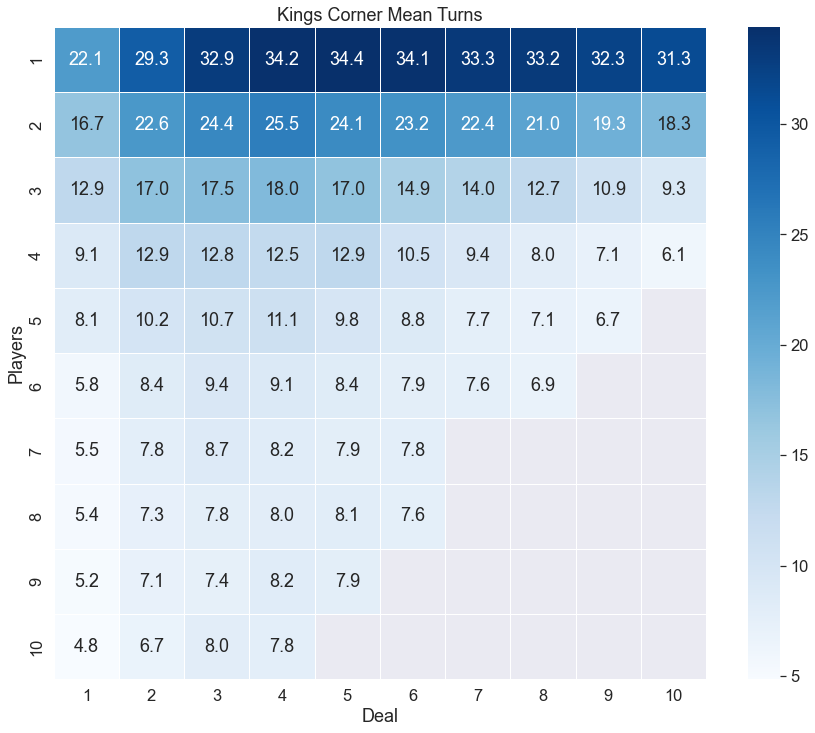

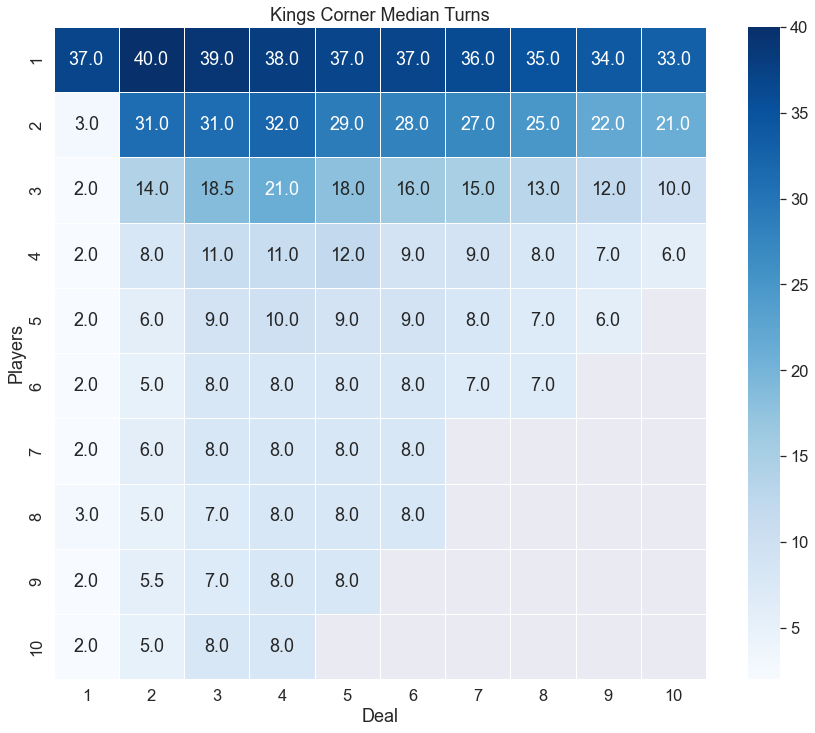

In [5]:
for col in ["Mean", "Median"]:
    np_data = raw_data[col].to_numpy()
    # number of players is rows, deal is colums
    np_data = np_data.reshape(len(players), len(deal))
    scale = 1.5
    plt.figure(figsize=(scale*len(deal), scale*(len(players)-2)))
    sn.set(font_scale=scale)  # Label size
    ax = plt.gca()
    sn.heatmap(np_data,
    ax=ax,
    annot=True, fmt=".1f", annot_kws={"size": scale*12},
    cmap='Blues',
    xticklabels=deal,  yticklabels=players,
    square=True, linewidths=0.5)
    ax.set_ylabel("Players")
    ax.set_xlabel("Deal")
    plt.title(f"Kings Corner {col} Turns")
    plt.savefig(f"kings_corner_{col}.png", bbox_inches="tight")